In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [100]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [101]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [103]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [104]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df.describe().style.format(precision=2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


.For the columns "Quantity", "Unit price" and "Rating" :The mean and the median are close, which suggests a symmetrical distribution, In the other hand The range (Max - Min) is large compared to the standard deviation. So based on that we can say that the data is not likely normally distributed
=================================================================================================================================================
.For the column "Rating": The mean and the median are equale, also the std and the range have value of 0. So we have a uniform distribution with a very narrow range
=================================================================================================================================================
.For the columns "Tax", "Total", "cogs" and "gross income": we can see that the mean is greater than the median, which means that we have Right-skewed distribution.

Ploting The Distribution And Skewness

<Axes: xlabel='Rating', ylabel='Count'>

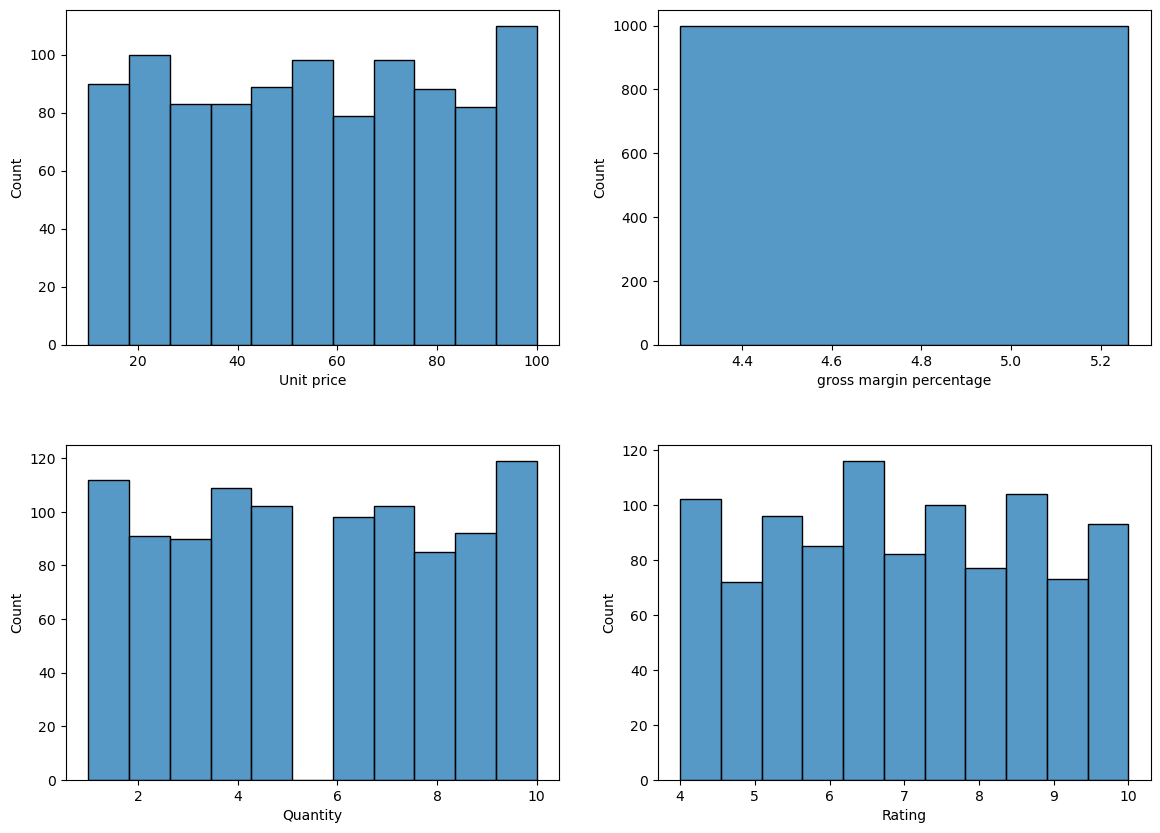

In [107]:
fig, axs = plt.subplots(2, 2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
sns.histplot(x = 'Unit price', data = df, ax = axs[0,0] )
sns.histplot(x = 'gross margin percentage',data = df, ax = axs[0,1] )
sns.histplot(x = 'Quantity',data = df, ax = axs[1,0] )
sns.histplot(x = 'Rating',data = df ,ax = axs[1,1] )

For the column "gross margin", we can see that the histogram shown a uniform distribution.
For "Quantity", "Rating", "Unit price", are not normally distributed.

<Axes: xlabel='Total', ylabel='Count'>

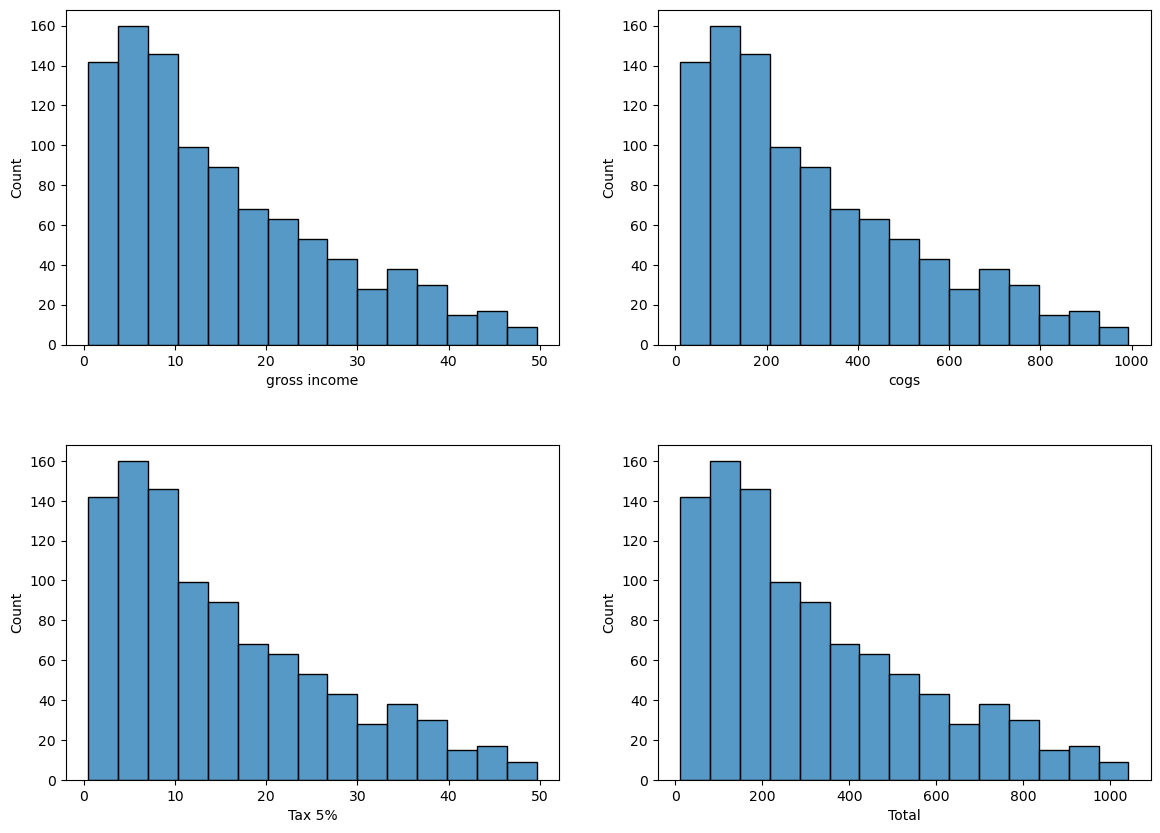

In [108]:
fig, ax = fig, axs = plt.subplots(2, 2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
sns.histplot(x = 'gross income', data = df, ax = axs[0,0] )
sns.histplot(x = 'cogs',data = df, ax = axs[0,1] )
sns.histplot(x = 'Tax 5%',data = df, ax = axs[1,0] )
sns.histplot(x = 'Total',data = df ,ax = axs[1,1] )

For the variable "Tax", "Total", "cogs" and "gross income", the histograms showed shapes that lean to the left, with a higher concentration of bars on the left side and tails extending towards the right. which confirm the observation of right-skewed distributions.

In [109]:
#Outliers affects The Eda so we will  remove it

In [110]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<Axes: xlabel='Total'>

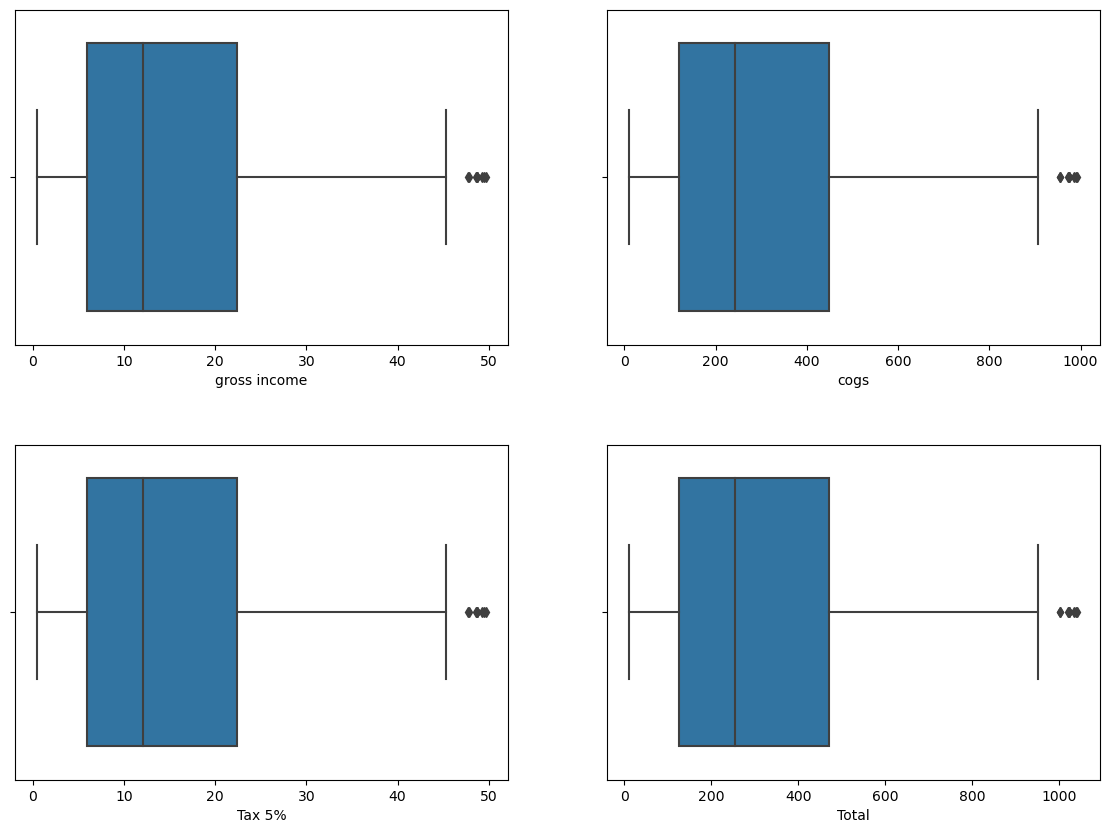

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
sns.boxplot(x = 'gross income', data = df, ax = axs[0,0] )
sns.boxplot(x = 'cogs',data = df, ax = axs[0,1] )
sns.boxplot(x = 'Tax 5%',data = df, ax = axs[1,0] )
sns.boxplot(x = 'Total',data = df ,ax = axs[1,1] )

In [112]:
columns = ['gross income','cogs','Tax 5%', 'Total']
import pandas as pd

def remove_outliers(df, columns):
    """
    Removes outliers from the specified columns in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): A list of column names to clean.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed from the specified columns.
    """
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Define the bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [113]:
df=remove_outliers(df,columns)

<Axes: xlabel='Total'>

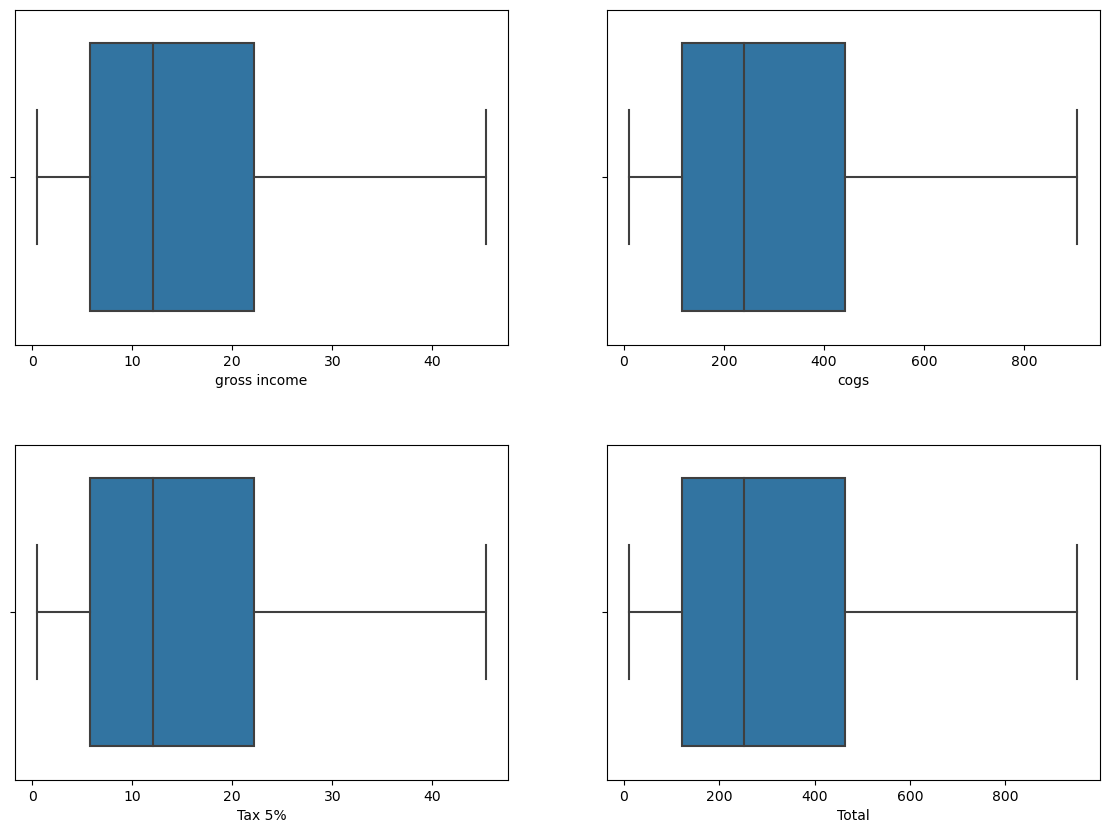

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
sns.boxplot(x = 'gross income', data = df, ax = axs[0,0] )
sns.boxplot(x = 'cogs',data = df, ax = axs[0,1] )
sns.boxplot(x = 'Tax 5%',data = df, ax = axs[1,0] )
sns.boxplot(x = 'Total',data = df ,ax = axs[1,1] )

Now Lets Break To The Eda and visulaization

In [115]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Univarte Anlysis

In [118]:
pd.DataFrame(df['Branch'].value_counts(ascending = False))

,Branch
A,339
B,330
C,322


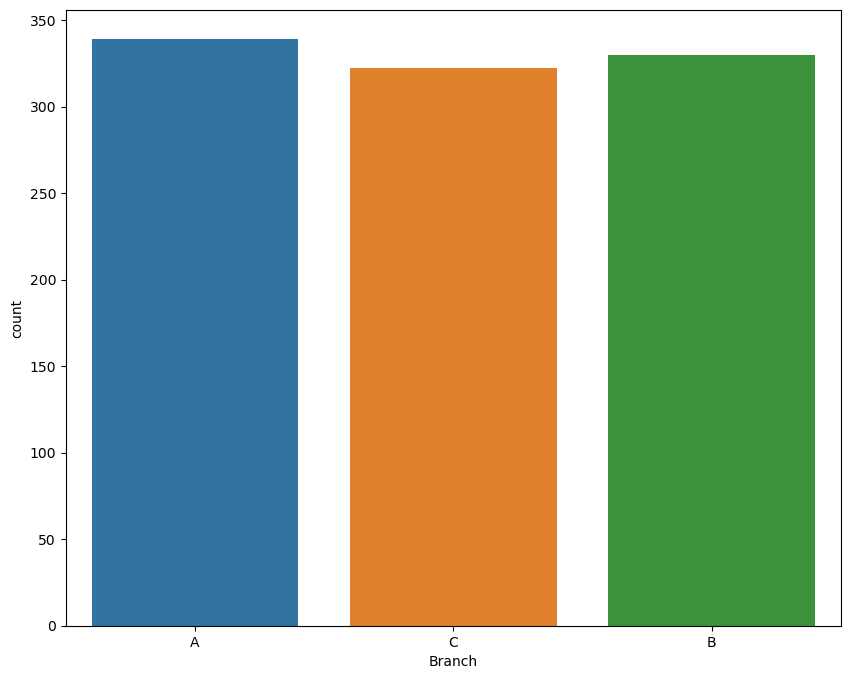

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Branch',data=df)
plt.show()

Branch C is the Top

In [119]:
pd.DataFrame(df['Gender'].value_counts(ascending = False))

,Gender
Male,496
Female,495


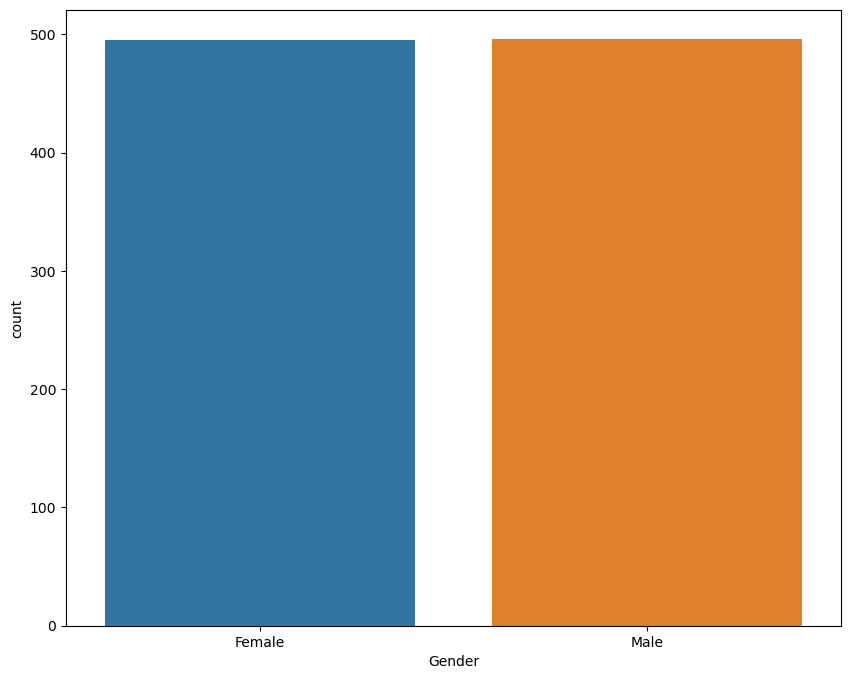

In [120]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Gender',data=df)
plt.show()

Almost The Same Numbers

In [122]:
pd.DataFrame(df['Payment'].value_counts(ascending = False))

,Payment
Ewallet,342
Cash,342
Credit card,307


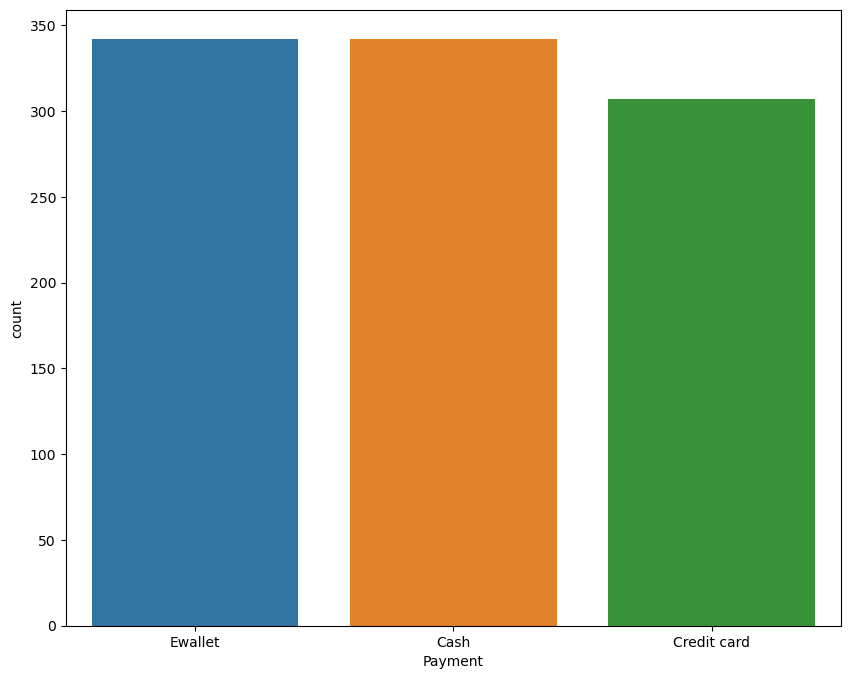

In [123]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Payment',data=df)
plt.show()

Ewallet and Cash are almost the most used ways to pay

In [127]:
pd.DataFrame(df['Customer type'].value_counts(ascending = False)) 


,Customer type
Member,498
Normal,493


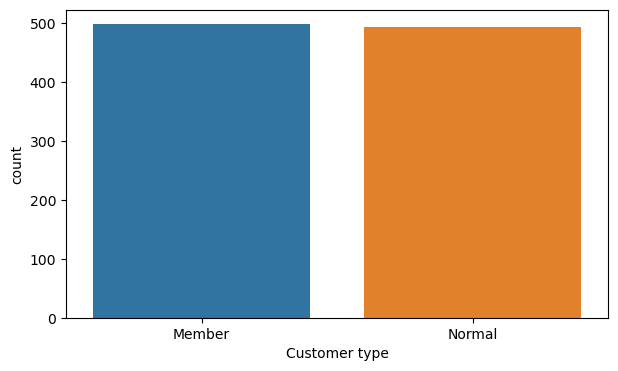

In [128]:
plt.figure(figsize=(7, 4))
sns.countplot(data = df, x = "Customer type")
plt.show()

In [125]:
pd.DataFrame(df['City'].value_counts(ascending = False))

,City
Yangon,339
Mandalay,330
Naypyitaw,322


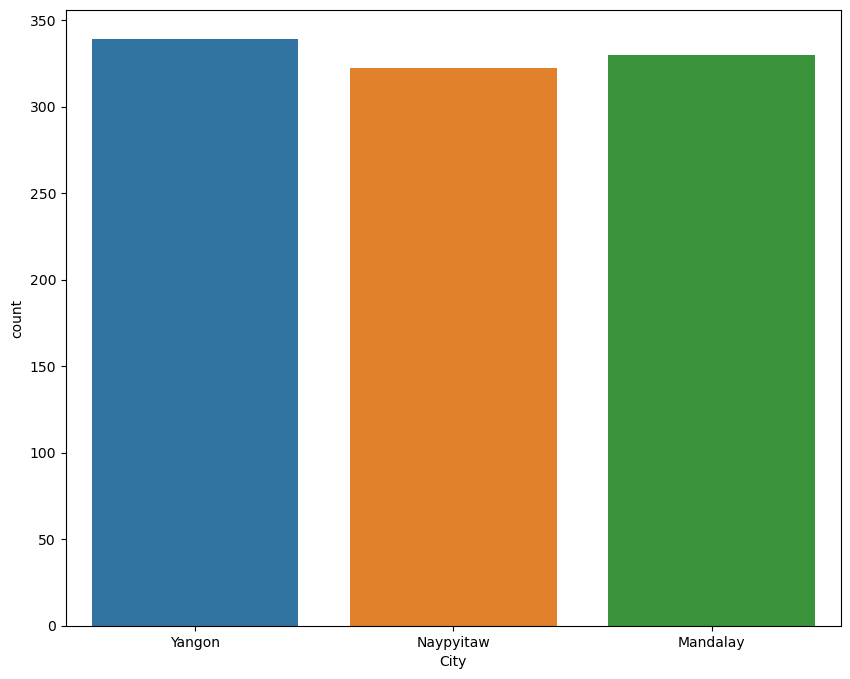

In [126]:
plt.figure(figsize=(10,8))
sns.countplot(x ='City',data=df)
plt.show()

In [ ]:
pd.DataFrame(df['Product line'].value_counts(ascending = False))

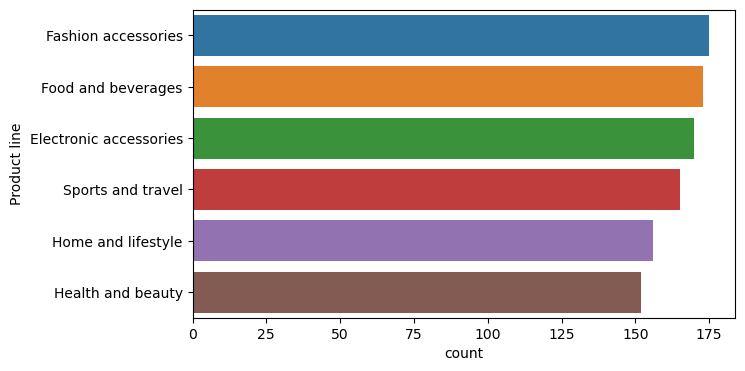

In [130]:
plt.figure(figsize=(7, 4))
# Create an order
Pl_counts = df['Product line'].value_counts().sort_values(ascending=False)
sns.countplot(data = df, y = 'Product line', order = Pl_counts.index.tolist())
plt.show()

Summary:

Branch A has the most customers. This could be due to its location in a high-traffic area, its larger size offering a potentially wider product selection, or a unique product mix catering to the specific demands of its local customer base.

Yangon has the most customers. This could be due to a combination of factors, such as the concentration of branches in Yangon, the demographics of the city with a larger potential customer base, or targeted marketing efforts focused on this location.

Generally, customers prefer to use e-wallet is preferred for payment.

Fashion accessories are selling slightly higher in quantity than other products.This could be due to the current trends, seasonal factors, or promotions.

Bivariate analysis

In [124]:
fig = px.histogram(df,x='Branch',color='Gender')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

In [147]:
fig = px.histogram(df,x='Branch',color='Customer type')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

In [146]:
fig = px.histogram(df,x='Customer type',color='Gender')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

In [148]:
fig = px.histogram(df,x='Branch',color='Payment')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

fig = px.histogram(df,x='Branch',color='Gender')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

Date_Columns
. A column for The Day
. A column for the hour

In [131]:
df['Day']=df['Date'].dt.day

In [132]:
df['Week_day']= df['Date'].dt.strftime('%A')
weekday_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']#Usa order
df['Week_day'] = pd.Categorical(df['Week_day'], categories=weekday_categories, ordered=True)

In [133]:
#hour_column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

def extract_Daytime(x):
    if x == 00:
        return 'Midnight'
    elif x == 12:
        return "Noon"
    elif x > 00 and x < 12:
        return "Morning"
    elif x > 12 and x < 18:
        return "Afternoon"
    else:
        return "Evening"


In [134]:
df['Daytime_Period'] = df['Hour'].apply(extract_Daytime)

C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\3643903805.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




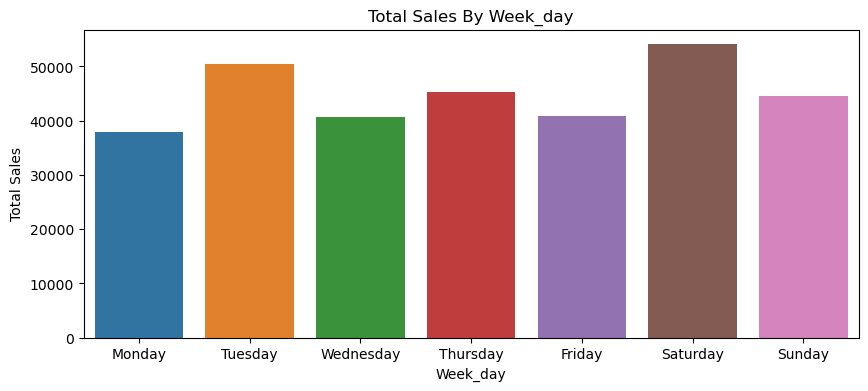

In [135]:
plt.figure(figsize=(10, 4))
sns.barplot(data = df, x = 'Week_day', y = 'Total',ci = None, estimator='sum')
plt.ylabel('Total Sales')
plt.title('Total Sales By Week_day')
plt.show()

In [151]:
fig = px.histogram(df,x='Branch',color='Week_day')
fig.update_layout(
    title="Branch Distribution By Gender",
    xaxis=dict(title="Branch"),
    yaxis=dict(title="Count")
)
fig.show()

Saturday is the most day people go shopping (Its the weekend)

C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\666092114.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




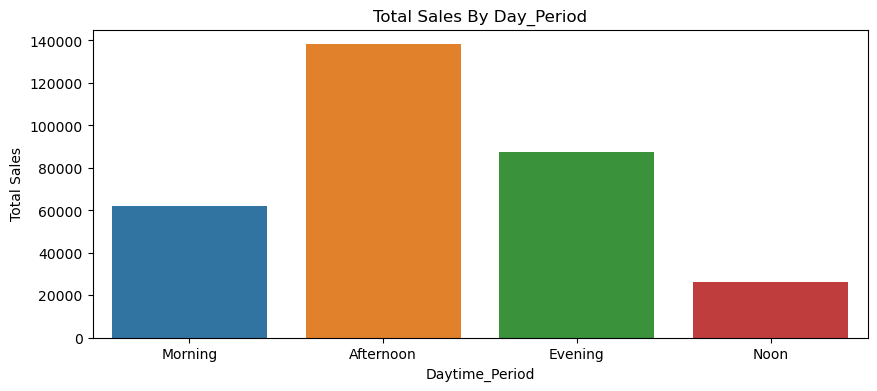

In [136]:
daytime_period_order = ['Morning', 'Afternoon', 'Evening', 'Noon']
df['Daytime_Period'] = pd.Categorical(df['Daytime_Period'], categories=daytime_period_order, ordered=True)

plt.figure(figsize=(10, 4))
sns.barplot(data = df, x = 'Daytime_Period', y = 'Total',ci = None, estimator='sum')
plt.ylabel('Total Sales')
plt.title('Total Sales By Day_Period')
plt.show()

Afternoon is the most period people go shopping (After working hour)

C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\1442449754.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




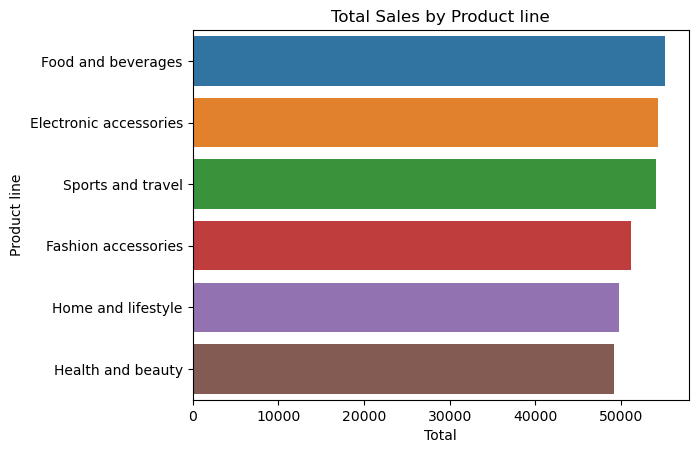

In [137]:
T_lineProduct= df.groupby('Product line')['Total'].sum().sort_values(ascending = False)

sns.barplot(data = df,
           x = 'Total',
           y = 'Product line',
           estimator = 'sum',
           ci = None,
           order = T_lineProduct.index.tolist()).set(title='Total Sales by Product line')
plt.show()

In [138]:
pd.DataFrame(round(df.groupby('Branch')['Total'].sum().sort_values(ascending = False),2))

,Total
Branch,
A,105161.08
C,104441.43
B,104152.80


C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\3927431874.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




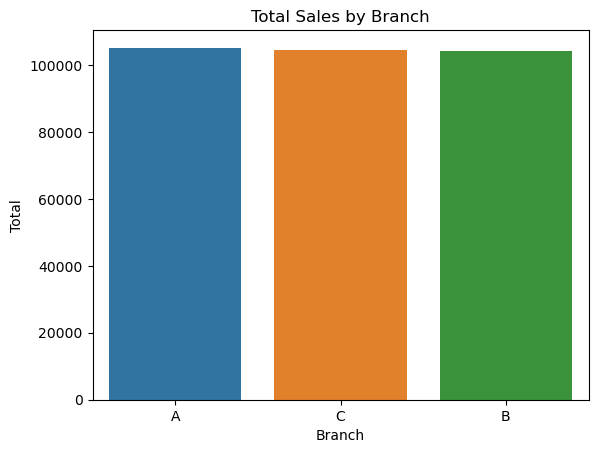

In [139]:
B_Total= df.groupby('Branch')['Total'].sum().sort_values(ascending = False)

sns.barplot(data = df,
           y = 'Total',
           x = 'Branch',
           estimator = 'sum',
           ci = None,
           order = B_Total.index.tolist()).set(title='Total Sales by Branch')
plt.show()

In [ ]:
pd.DataFrame(round(df.groupby('Branch')['Total'].sum().sort_values(ascending = False),2))

C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\2359588038.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




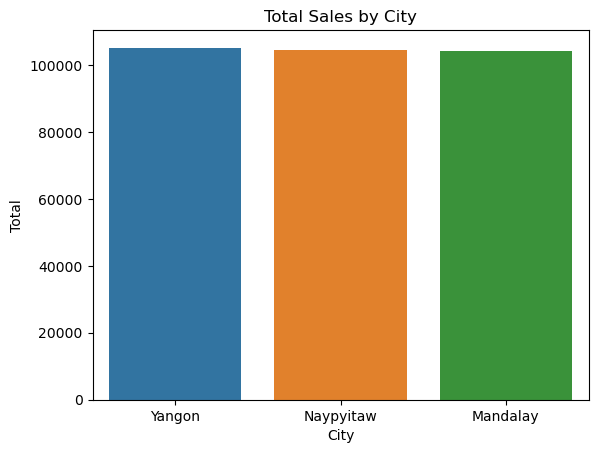

In [140]:
C_Total= df.groupby('City')['Total'].sum().sort_values(ascending = False)

sns.barplot(data = df,
           y = 'Total',
           x = 'City',
           estimator = 'sum',
           ci = None,
           order = C_Total.index.tolist()).set(title='Total Sales by City')
plt.show()

In [141]:
pd.DataFrame(round(df.groupby('Customer type')['Total'].sum().sort_values(ascending = False),2))


,Total
Customer type,
Member,161125.63
Normal,152629.68


C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\3551674851.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




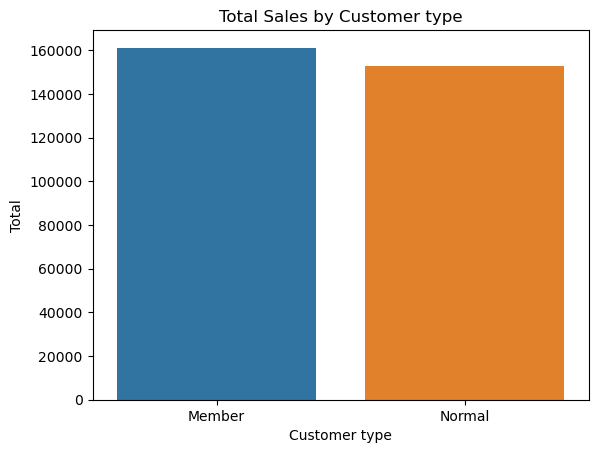

In [142]:
sns.barplot(data = df,
           y = 'Total',
           x = 'Customer type',
           estimator = 'sum',
           ci = None).set(title='Total Sales by Customer type')
plt.show()

In [143]:
pd.DataFrame(round(df.groupby('Gender')['Total'].sum().sort_values(ascending = False),2))

,Total
Gender,
Female,161738.12
Male,152017.19


C:\Users\ghozy\AppData\Local\Temp\ipykernel_2536\1911659736.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




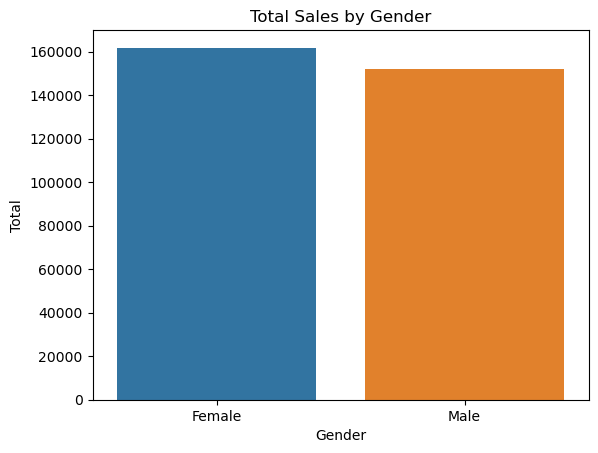

In [144]:
sns.barplot(data = df,
           y = 'Total',
           x = 'Gender',
           estimator = 'sum',
           ci = None).set(title='Total Sales by Gender')
plt.show()